<a href="https://colab.research.google.com/github/gowshik-gs/CAREER-CRAFTER/blob/ml_workshop/housing_data_lin_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will construct a linear model that explains the relationship a car's mileage (mpg) has with its other attributes

## Import Libraries

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function


## Load and review data

In [4]:
c = pd.read_csv("HousingData.csv")
c.shape

(506, 14)

In [7]:
# 8 variables:
#
# MPG (miles per gallon),
# cylinders,
# engine displacement (cu. inches),
# horsepower,
# vehicle weight (lbs.),
# time to accelerate from O to 60 mph (sec.),
# model year (modulo 100), and
# origin of car (1. American, 2. European,3. Japanese).
#
# Also provided are the car labels (types)
# Missing data values are marked by series of question marks.


c.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [14]:
#dropping/ignoring car_name
c = c.drop('CRIM', axis=1)
# Also replacing the categorical var with actual values
c['CHAS'] = c['CHAS'].replace({0: 'zero', 1: 'one'})
c.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,18.0,2.31,zero,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.0,7.07,zero,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.0,7.07,zero,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.0,2.18,zero,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.0,2.18,zero,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [15]:
c.tail()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.0,11.93,zero,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.0,11.93,zero,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.0,11.93,zero,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.0,11.93,zero,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.0,11.93,zero,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


## Create Dummy Variables
Values like 'america' cannot be read into an equation. Using substitutes like 1 for america, 2 for europe and 3 for asia would end up implying that european cars fall exactly half way between american and asian cars! we dont want to impose such an baseless assumption!

So we create 3 simple true or false columns with titles equivalent to "Is this car America?", "Is this care European?" and "Is this car Asian?". These will be used as independent variables without imposing any kind of ordering between the three regions.




In [16]:
c = pd.get_dummies(c, columns=['CHAS'])
c.head()

,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_one,CHAS_zero
0,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,False,True
1,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,False,True
2,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,False,True
3,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,False,True
4,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2,False,True


In [17]:
c.tail()

,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_one,CHAS_zero
501,0.0,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4,False,True
502,0.0,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,False,True
503,0.0,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,False,True
504,0.0,11.93,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,False,True
505,0.0,11.93,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9,False,True


## Dealing with Missing Values

In [18]:
#A quick summary of the data columns
c.describe()

,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,11.211934,11.083992,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,23.388876,6.835896,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.000000,5.190000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.000000,9.690000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,12.500000,18.100000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
# hp is missing cause it does not seem to be reqcognized as a numerical column!
c.dtypes

,0
ZN,float64
INDUS,float64
NOX,float64
RM,float64
AGE,float64
DIS,float64
RAD,int64
TAX,int64
PTRATIO,float64
B,float64


In [25]:
# Convert the 'CHAS_one' column to string type before using .str.isdigit()
hpIsDigit = pd.DataFrame(c.CHAS_one.astype(str).str.isdigit())  # if the string is made of digits store True else False

c[hpIsDigit['CHAS_one'] == False]   # from temp take only those rows where hp has false

,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_one,CHAS_zero
0,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,False,True
1,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,False,True
2,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,False,True
3,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,False,True
4,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4,False,True
502,0.0,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,False,True
503,0.0,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,False,True
504,0.0,11.93,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,False,True


In [26]:
# Missing values have a'?''
# Replace missing values with NaN
c = c.replace('?', np.nan)
c[hpIsDigit['CHAS_one'] == False]

,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_one,CHAS_zero
0,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,False,True
1,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,False,True
2,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,False,True
3,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,False,True
4,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4,False,True
502,0.0,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,False,True
503,0.0,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,False,True
504,0.0,11.93,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,False,True


There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. of the 398 rows 6 have NAN in the hp column. We could drop those 6 rows - which might not be a good idea under all situations


In [27]:
#instead of dropping the rows, lets replace the missing values with median value.
c.median()

,0
ZN,0.00000
INDUS,9.69000
NOX,0.53800
RM,6.20850
AGE,76.80000
DIS,3.20745
RAD,5.00000
TAX,330.00000
PTRATIO,19.05000
B,391.44000


In [35]:
# Step 1: Convert all non-numeric values in the DataFrame to NaN
c= c.apply(pd.to_numeric, errors='coerce')

# Step 2: Replace missing values in all columns with their respective median values
medianFiller = lambda x: x.fillna(x.median())
c = c.apply(medianFiller, axis=0)

# Step 3: Convert 'CHAS' to numeric, coercing errors into NaN (if not already done in Step 1)
# Changed 'CHAS_one' to 'CHAS based on the assumption that this was a typo
c['CHAS'] = pd.to_numeric(c['CHAS'], errors='coerce')

# Step 4: Convert 'CHAS' column to float64
# Changed 'CHAS_one' to 'CHAS based on the assumption that this was a typo
c['CHAS'] = c['CHAS'].astype('float64')

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


## BiVariate Plots

A bivariate analysis among the different variables can be done using scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file.

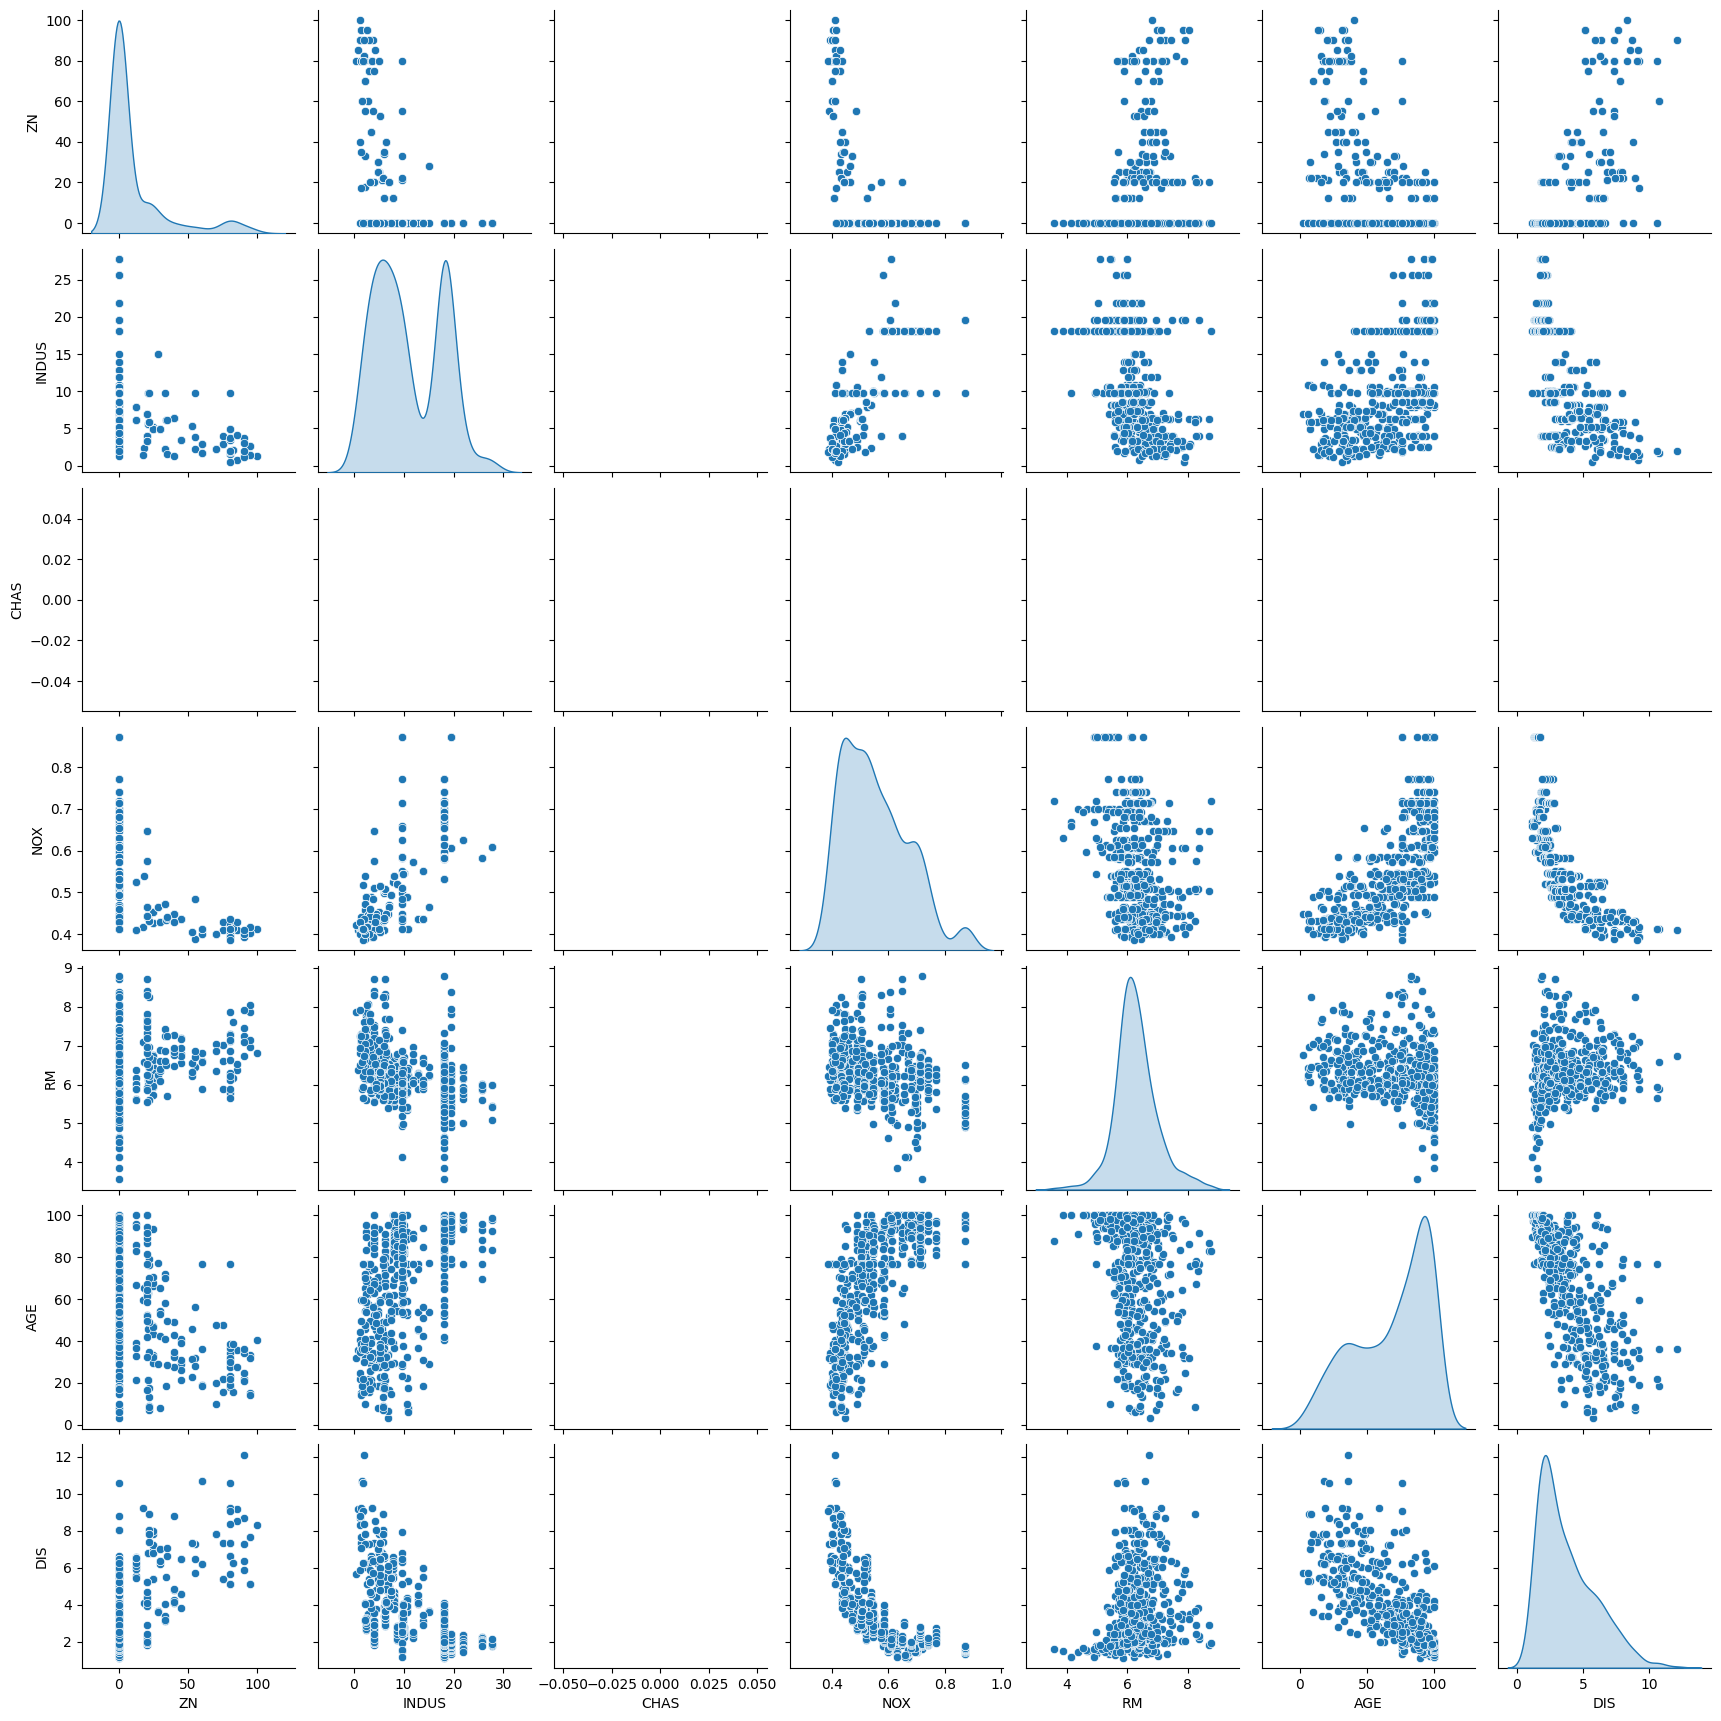

In [36]:
cData_attr = c.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   # to plot density curve instead of histogram on the diag

Observation between 'mpg' and other attributes indicate the relationship is not really linear. However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern. Several assumptions of classical linear regression seem to be violated, including the assumption of no Heteroscedasticity


## Split Data

In [46]:
# lets build our linear model
# independant variables
X = c.drop(['RM','CHAS'], axis=1)
# the dependent variable
y = c[['NOX']]

In [47]:
X.shape

(506, 11)

In [48]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [49]:
X_train.shape

(354, 11)

In [50]:
X_test.shape

(152, 11)

## Fit Linear Model

In [51]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

Here are the coefficients for each variable and the intercept

In [52]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for ZN is -1.4730617693710216e-16
The coefficient for INDUS is 1.1449174941446927e-16
The coefficient for NOX is 1.0000000000000022
The coefficient for AGE is -4.494018004952416e-17
The coefficient for DIS is 9.374147508581232e-16
The coefficient for RAD is -1.0223348860180503e-16
The coefficient for TAX is -3.187554387107383e-17
The coefficient for PTRATIO is -2.3168045173299623e-17
The coefficient for B is 2.1629833341085813e-17
The coefficient for LSTAT is 1.349018553115089e-16
The coefficient for MEDV is 2.0098397772450038e-17


The score (R^2) for in-sample and out of sample

In [53]:
regression_model.score(X_train, y_train)

1.0

In [54]:
#out of sample score (R^2)

regression_model.score(X_test, y_test)


1.0

## Adding interaction terms


In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

1.0


In [56]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))

1.0


In [57]:
# but this improves as the cost of 29 extra variables!
print(X_train.shape)
print(X_train2.shape)

(354, 11)
(354, 67)


Polynomial Features (with only interaction terms) have improved the Out of sample R^2. However at the cost of increaing the number of variables significantly.
